<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/SARIMAX_for_bridging_project_Corrected_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX




from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, Flatten
from keras.layers import GRU

import numpy as np

In [ ]:
df = pd.read_excel('/content/electricty_real_selected_data .xlsx')
df.drop(df.loc[df['Date'].duplicated()].index, inplace = True)
#df['datetime'] = pd.to_datetime(df['Date'])

# df = df.sort_values(df['datetime'], ascending=[True])


df.set_index(df['Date'], inplace = True)
df.drop(columns = [ 'Date'], inplace = True)

In [ ]:
df

,price day ahead real,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,,
2014-12-31 23:59:59.991,18.29,40242.25,8280.00,0.0,21.30,55.17,7.27
2015-01-01 00:59:59.991,16.04,39158.50,8412.75,0.0,21.30,55.17,7.27
2015-01-01 01:59:59.991,14.60,38824.50,8502.25,0.0,21.30,55.17,7.27
2015-01-01 02:59:59.991,14.95,38969.25,8668.50,0.0,21.30,55.17,7.27
2015-01-01 03:59:59.991,14.50,39092.75,8849.25,0.0,21.30,55.17,7.27
...,...,...,...,...,...,...,...
2020-12-31 18:59:59.980,56.70,49516.00,8053.50,0.0,19.12,56.49,32.59
2020-12-31 19:59:59.980,52.44,47747.50,7456.50,0.0,19.12,56.49,32.59
2020-12-31 20:59:59.980,51.86,47761.75,6902.50,0.0,19.12,56.49,32.59


In [ ]:
#steps=24
dataset_for_prediction= df.copy()
#dataset_for_prediction[' Prices']=dataset_for_prediction[' Prices',' Generation forecast', ' System load forecast'].shift(-steps)
#dataset_for_prediction=dataset_for_prediction.dropna()

In [ ]:
#sc_in = MinMaxScaler(feature_range=(0, 1))
#scaled_input = sc_in.fit_transform(dataset_for_prediction[['price day ahead real','Estimated price ']])
##scaled_input =pd.DataFrame(scaled_input)
#X= scaled_input

#sc_out = MinMaxScaler(feature_range=(0, 1))
#scaler_output = sc_out.fit_transform(dataset_for_prediction[['price day ahead real']])
#scaler_output =pd.DataFrame(scaler_output)
#y=scaler_output

In [ ]:
list( dataset_for_prediction.columns)

['price day ahead real', 'Demand DE', 'Wind', 'PV', 'Gas', 'Coal', 'CO2']

In [ ]:
#X.rename(columns = {0:'price day ahead real',
# 1:'Estimated price ',}, inplace = True)

In [ ]:
x = df.iloc[:, 1:8]
y= df.iloc[:, 0]

In [ ]:
x

,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,
2014-12-31 23:59:59.991,40242.25,8280.00,0.0,21.30,55.17,7.27
2015-01-01 00:59:59.991,39158.50,8412.75,0.0,21.30,55.17,7.27
2015-01-01 01:59:59.991,38824.50,8502.25,0.0,21.30,55.17,7.27
2015-01-01 02:59:59.991,38969.25,8668.50,0.0,21.30,55.17,7.27
2015-01-01 03:59:59.991,39092.75,8849.25,0.0,21.30,55.17,7.27
...,...,...,...,...,...,...
2020-12-31 18:59:59.980,49516.00,8053.50,0.0,19.12,56.49,32.59
2020-12-31 19:59:59.980,47747.50,7456.50,0.0,19.12,56.49,32.59
2020-12-31 20:59:59.980,47761.75,6902.50,0.0,19.12,56.49,32.59


In [ ]:
y

Date
2014-12-31 23:59:59.991    18.29
2015-01-01 00:59:59.991    16.04
2015-01-01 01:59:59.991    14.60
2015-01-01 02:59:59.991    14.95
2015-01-01 03:59:59.991    14.50
                           ...  
2020-12-31 18:59:59.980    56.70
2020-12-31 19:59:59.980    52.44
2020-12-31 20:59:59.980    51.86
2020-12-31 21:59:59.980    52.26
2020-12-31 22:59:59.980    50.87
Name: price day ahead real, Length: 52608, dtype: float64

In [ ]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [ ]:
train_X, train_y = x[24:34968], y[24:34968] 
test_X, test_y = x[34968:].dropna(), y[34968:].dropna()

In [ ]:
x.index = dataset_for_prediction.index
#X.drop(columns = 'price day ahead real', inplace = True)

y.rename(columns={0:'Electricity price in 24 hours'}, inplace= True)
y.index=dataset_for_prediction.index

In [ ]:
test_X

,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,
2018-12-27 23:59:59.983,45989.079520,10105.00,0.0,22.81,76.98,24.70
2018-12-28 00:59:59.983,45152.545489,10072.00,0.0,22.81,76.98,24.70
2018-12-28 01:59:59.983,45354.201505,10045.25,0.0,22.81,76.98,24.70
2018-12-28 02:59:59.983,46689.309878,9910.00,0.0,22.81,76.98,24.70
2018-12-28 03:59:59.983,49323.669473,9588.75,0.0,22.81,76.98,24.70
...,...,...,...,...,...,...
2020-12-31 18:59:59.980,49516.000000,8053.50,0.0,19.12,56.49,32.59
2020-12-31 19:59:59.980,47747.500000,7456.50,0.0,19.12,56.49,32.59
2020-12-31 20:59:59.980,47761.750000,6902.50,0.0,19.12,56.49,32.59


In [ ]:
train_y

,price day ahead real
Date,
2015-01-01 23:59:59.991,-19.63
2015-01-02 00:59:59.991,-19.37
2015-01-02 01:59:59.991,-31.41
2015-01-02 02:59:59.991,-46.97
2015-01-02 03:59:59.991,-13.48
...,...
2018-12-27 18:59:59.983,70.00
2018-12-27 19:59:59.983,62.56
2018-12-27 20:59:59.983,64.62


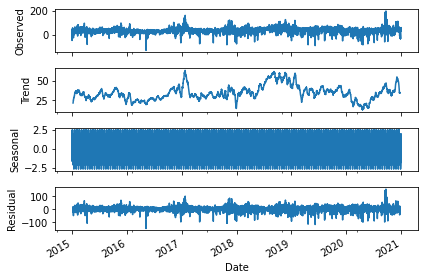

In [ ]:
seas_d=sm.tsa.seasonal_decompose(y,model='add',freq=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout['critical value {}'.format(key)]=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)
        
y_test=y['price day ahead real'][24:52608 ].dropna()
test_adf(y_test, " Electricity Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary  Electricity Price


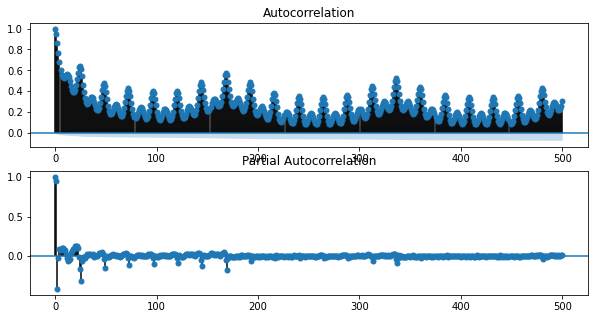

In [ ]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=500, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=500, ax=ax[1])
plt.show()

In [ ]:
!sudo pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 step_wise = auto_arima(train_y, 
     exogenous= train_X,
     start_p=0, start_q=0, 
     max_p=5, max_q=5, 
     d=1, max_d=168,
     n_jobs = -1,
     start_Q=0,
     max_P=5,
     max_D=5,
     max_Q=5,
     seasonal = True,
     stationary = True,
     trace=True, 
     error_action='ignore', 
     suppress_warnings=True, 
     random = True,
     stepwise=False)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gen = random_state.permutation(list(gen))[:n_fits]



Best model:  ARIMA(5,0,0)(0,0,0)[1] intercept
Total fit time: 465.200 seconds


In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                34944
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -93566.290
Date:                Mon, 20 Jun 2022   AIC                         187158.580
Time:                        09:35:08   BIC                         187268.579
Sample:                             0   HQIC                        187193.620
                              - 34944                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1150      0.157     -0.734      0.463      -0.422       0.192
Demand DE      0.0012   7.02e-06    168.179      0.000       0.001       0.001
Wind          -0.0012   1.79e-05    -69.377      0.000      -0.001      -0.001
PV            -0.0011   1.19e-05    -89.316      0.000      -0.001      -0.001
Gas           -0.9349      0.124     -7.521      0.000      -1.179      -0.691
Coal          -0.1258      0.022     -5.637      0.000      -0.170      -0.082
CO2            1.6206      0.079     20.639      0.000       1.467       1.774
ar.L1          0.9450      0.002    525.490      0.000       0.941       0.949
ar.L2         -0.0837      0.003    -26.368      0.000      -0.090      -0.078
ar.L3         -0.0599      0.004    -16.134      0.000      -0.067      -0.053
ar.L4          0.0217      0.004      4.958      0.000       0.013       0.030
ar.L5          0.1015      0.003     32.970      0.000       0.096       0.108
sigma2        13.4638      0.029    459.456      0.000      13.406      13.521
===================================================================================
Ljung-Box (Q):                     3720.95   Jarque-Bera (JB):           3271630.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model= SARIMAX(train_y, 
 exog=train_X,
 order=(5,0,0),
enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


In [ ]:
results=model.fit()

forecast = results.forecast(steps=17640, exog = test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


In [ ]:
train_size = 34968
test_size = 52608
steps = -24

In [ ]:
y


,price day ahead real
Date,
2014-12-31 23:59:59.991,18.29
2015-01-01 00:59:59.991,16.04
2015-01-01 01:59:59.991,14.60
2015-01-01 02:59:59.991,14.95
2015-01-01 03:59:59.991,14.50
...,...
2020-12-31 18:59:59.980,56.70
2020-12-31 19:59:59.980,52.44
2020-12-31 20:59:59.980,51.86


In [ ]:
predictions= results.predict(start = 34968, end=52608+(steps)-1 ,exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


In [ ]:
forecast_electricity= pd.DataFrame(forecast)
forecast_electricity.reset_index(drop=True, inplace=True)
forecast_electricity.index=test_X.index
forecast_electricity['Actual'] =y.iloc[34968:, 0]
forecast_electricity.rename(columns={0:'Forecast'}, inplace=True)

In [ ]:

forecast_electricity['Forecast']

Date
2018-12-27 23:59:59.983    50.138688
2018-12-28 00:59:59.983    49.173831
2018-12-28 01:59:59.983    49.497919
2018-12-28 02:59:59.983    51.093145
2018-12-28 03:59:59.983    54.289427
                             ...    
2020-12-31 18:59:59.980    64.583485
2020-12-31 19:59:59.980    62.294897
2020-12-31 20:59:59.980    62.980435
2020-12-31 21:59:59.980    61.977881
2020-12-31 22:59:59.980    60.719123
Name: Forecast, Length: 17640, dtype: float64

In [ ]:
forecast_electricity['Actual']

Date
2018-12-27 23:59:59.983    50.00
2018-12-28 00:59:59.983    49.19
2018-12-28 01:59:59.983    48.51
2018-12-28 02:59:59.983    48.07
2018-12-28 03:59:59.983    49.82
                           ...  
2020-12-31 18:59:59.980    56.70
2020-12-31 19:59:59.980    52.44
2020-12-31 20:59:59.980    51.86
2020-12-31 21:59:59.980    52.26
2020-12-31 22:59:59.980    50.87
Name: Actual, Length: 17640, dtype: float64

In [ ]:
import csv 
forecast_electricity = pd.DataFrame(forecast_electricity)
forecast_electricity.to_csv("SARIMAX_rslts.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')

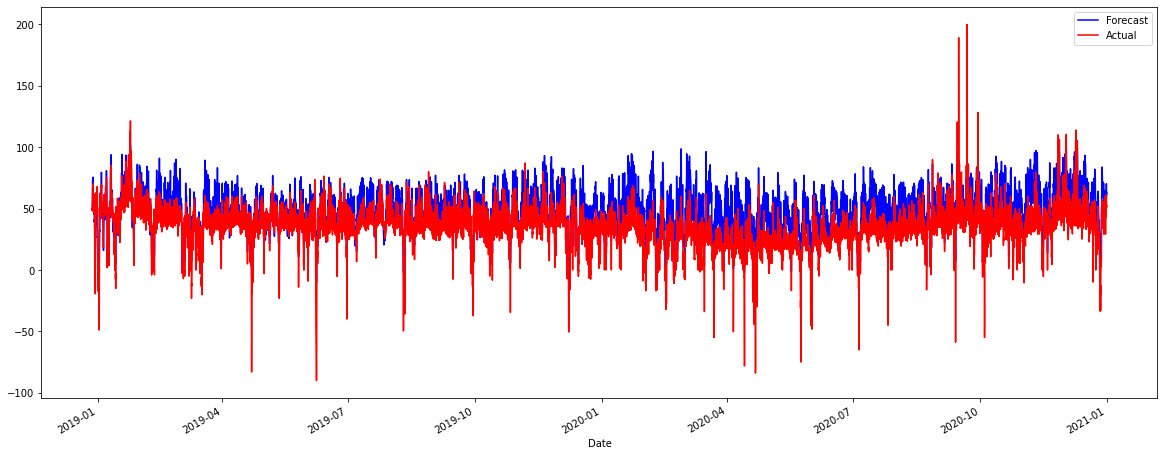

In [ ]:
forecast_electricity['Forecast'][:17640].plot(figsize=(20,8), legend=True, color='blue')
forecast_electricity['Actual'][:17640].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
from numpy import inf

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    difference = abs((y_true - y_pred))
    difference[difference == inf] = 0.01
    difference[difference == -inf] = 0.01
    difference[difference == 0] = 0.01
    y_true[y_true == 0] = 0.01
    return np.mean((difference/y_true) * 100)

In [ ]:
mape = mean_absolute_percentage_error(forecast_electricity['Actual'], forecast_electricity['Forecast'])
mape

245.7378355638589